# 一、实验准备

## 1、背景介绍
通信运营商如今面临着激烈的竞争，为了保持市场份额，一方面要吸引新的客户，但是由于市场高度饱和，运营商很难吸引到很多新的客户；另一方面要防止现有客户的流失。据统计，当合同过期的时候，20%客户会流失。现有客户的流失会给运营商带来巨大的损失：公司不仅要花更多的钱吸引新的客户，还面临着旧客户离开带来收益下降的困境。因为吸引新客户的成本远高于保留老客户的成本，所以通过历史数据找到可能流失的客户，并及时给予优惠政策，就变得越来越重要。

## 2、实验目的

构建更为合理的分类预测模型，为实际背景下的决策提供指导意义。

## 3、实验建议

（1）掌握数据描述，  
（2）对数据进行简单分析和预处理  
（3）机器学习模型（尤其是分类相关的模型）构建  
（4）参数的简单调整  
（5）以及模型评价，  
（5）数据可视化等能力；

# 二、实验步骤

## 1、数据集描述

COLLEGE : 是否大学学历  
INCOME : 年收入  
OVERAGE :平均每月超额收费  
LEFTOVER : 每月平均剩余通话时间百分比  
HOUSE : 房产价格（来自于人口普查）  
HANDSET_PRICE : 手机价格  
OVER_15MINS_CALLS_PER_MONTH :平均每月长通话数量（大于15分钟）  
AVERAGE_CALL_DURATION : 平均通话时长  
REPORTED_SATISFACTION : 满意程度  
REPORTED_USAGE_LEVEL : 使用程度  
CONSIDERING_CHANGE_OF_PLAN : 是否考虑改变计划  
LEAVE : 是否流失

## 2、载入数据

查看当前工作路径

In [18]:
import os
os.getcwd()

'C:\\Users\\zlw\\Documents\\我的坚果云\\SUFE\\上财课程\\上财MBA\\大数据商业实战\\Python实战\\scikit-learn\\action\\churn\\churn'

python开发中经常遇到报错的情况，但是warning通常并不影响程序的运行，而且有时特别讨厌，我们采用如下代码控制警告错误的输出。

In [19]:
import warnings
warnings.filterwarnings('ignore')

通过pandas导入数据，导入数据之后，通过describe()方法，进行数据的基本查看：

In [20]:
import pandas as pd
Churn = pd.read_csv("churn.csv")
print(Churn.describe())

              INCOME       OVERAGE      LEFTOVER          HOUSE  \
count   17999.000000  17999.000000  17999.000000   17999.000000   
mean    80352.090394     86.067282     23.851158  492314.562865   
std     41709.873538     86.030584     26.822720  252096.642665   
min     20007.000000     -2.000000      0.000000  150002.000000   
25%     42252.000000      0.000000      0.000000  262920.500000   
50%     75282.000000     59.000000     14.000000  451263.000000   
75%    116212.500000    179.000000     41.000000  701617.500000   
max    159983.000000    335.000000     89.000000  999996.000000   

       HANDSET_PRICE  OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION  
count   17999.000000                 17999.000000           17999.000000  
mean      390.526696                     7.990611               6.009167  
std       214.012583                     8.920135               4.404633  
min       130.000000                     0.000000               1.000000  
25%       220.000000 

In [21]:
print(Churn.head())

  COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   
4     one   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTIO  \
0                            0                      4                unsat   
1                            0                      6                unsat   
2                           16                     15                unsat   
3                            3                      2                unsat   
4                           21                      1           very_unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1               little            

可以看到，数据的基本情况，一共有7列数值型数据,5列分类数据，对于非数值型数据需要进行数值化处理。

## 3、数据预处理

### 3.1 缺失数据的处理

缺失数据的处理方法通常有三种：

I)                填充法

这种方法，通常是通过填补平均数，中位数，众数，或者通过其他数据进行分析等，进行填充。一般情况下，对于少量缺失样本，可以通过中位数，众数，平均数等进行填充，但是出现的大量样本缺失的时候，可能就需要进行其他数据的综合分析（甚至包括简单的预测）才可以；

II)              删除法

该方法相对来说更加贴近客观事实，但是该方法会让样本数量大规模减少，最终可能会影响学习的效果，这种方法通常是适用于少量缺失值的时候；

III)             不处理

这种方法是通常针对缺失数据对结果值影响不大，或者没有办法进行填充等，再或者是可以将缺失值当做一个属性来看对待，当然这种方法不是非常常用的；

In [22]:
for eve in Churn:
    print("列名：\t%s\t, 有\t%d\t个缺失数据；"%(eve,list(Churn[eve]).count("NaN")))

列名：	COLLEGE	, 有	0	个缺失数据；
列名：	INCOME	, 有	0	个缺失数据；
列名：	OVERAGE	, 有	0	个缺失数据；
列名：	LEFTOVER	, 有	0	个缺失数据；
列名：	HOUSE	, 有	0	个缺失数据；
列名：	HANDSET_PRICE	, 有	0	个缺失数据；
列名：	OVER_15MINS_CALLS_PER_MONTH	, 有	0	个缺失数据；
列名：	AVERAGE_CALL_DURATION	, 有	0	个缺失数据；
列名：	REPORTED_SATISFACTIO	, 有	0	个缺失数据；
列名：	REPORTED_USAGE_LEVEL	, 有	0	个缺失数据；
列名：	CONSIDERING_CHANGE_OF_PLAN	, 有	0	个缺失数据；
列名：	LEAVE	, 有	0	个缺失数据；


可以看到，数据一共有12列，不存在缺失数据

### 3.2 数据虚拟化

在进行预测，通常会遇到非数值型数据，例如某个事物具备多种属性，这个时候，就需要将属性变成数值形式，来进行后期的计算。

一般情况下，属性只有yes或no的时候，我们可以用0,1来表示，如果有多种属性，例如A,B,C,D等的时候，就需要用更多数字表示，例如1,2,3,4等。

In [23]:
Churn['COLLEGE'] = Churn['COLLEGE'].map({'zero':0,'one':1})
Churn['REPORTED_SATISFACTIO'] = Churn['REPORTED_SATISFACTIO'].map({'very_unsat': 0 ,
                                                                  'unsat': 1,'avg': 2, 
                                                                  'sat':3, 'very_sat':4})
Churn['REPORTED_USAGE_LEVEL'] = Churn['REPORTED_USAGE_LEVEL'].map({'very_little':0 ,
                                                                  'little': 1,'avg':2, 
                                                                  'high':3, 'very_high':4})
Churn['CONSIDERING_CHANGE_OF_PLAN'] = Churn['CONSIDERING_CHANGE_OF_PLAN'].map({'no': 0, 'never_thought':1,
                                                                               'perhaps':2,'considering':3,
                                                                              'actively_looking_into_it':4})

Churn['LEAVE'] = Churn['LEAVE'].map({'STAY':0,'LEAVE':1})

### 3.3 数据的规范化

  由于不同变量常常使用不同的度量单位，从数值上看它们相差很大，容易使基于距离度量的学习模型更容易受数值较大的变量影响。数据规范化就是将数据压缩到一个范围内，从而使得所有变量的单位影响一致。

一般情况下，数据范围不一样，通常都会预处理，例如A和B两个因素同时影响一个数据，A的范围是0-1，B的范围是1-100000，这样在预测时候可能默认将B的权重“变大”，影响结果，所以此时通常会做一些预处理，例如：

1：标准化：去均值，方差规模化

2：正则化

3：特征的二值化

4：归一化

本实验采用标准化方法处理，代码如下：

In [24]:
import numpy as np
temp_number_key = [ 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION']
for eve_key in temp_number_key:
    mean = np.mean(Churn[eve_key])
    std = np.std(Churn[eve_key])
    Churn[eve_key] = (Churn[eve_key]-mean)/std

## 4.构建分类模型

### 4.1 逻辑回归模型

#### 4.1.1模型简介

logistic回归又称logistic回归分析，是一种广义的线性回归分析模型，常用于数据挖掘，疾病自动诊断，经济预测等领域。例如，探讨引发疾病的危险因素，并根据危险因素预测疾病发生的概率等。

Logistic回归模型的适用条件：

（1）因变量为二分类的分类变量或某事件的发生率，并且是数值型变量。但是需要注意，重复计数现象指标不适用于Logistic回归。

（2）残差和因变量都要服从二项分布。二项分布对应的是分类变量，所以不是正态分布，进而不是用最小二乘法，而是最大似然法来解决方程估计和检验问题。

（3）自变量和Logistic概率是线性关系

（4） 各观测对象间相互独立。

原理：如果直接将线性回归的模型扣到Logistic回归中，会造成方程二边取值区间不同和普遍的非直线关系。因为Logistic中因变量为二分类变量，某个概率作为方程的因变量估计值取值范围为0-1，但是，方程右边取值范围是无穷大或者无穷小。所以，才引入Logistic回归。

Logistic回归实质：发生概率除以没有发生概率再取对数。就是这个不太繁琐的变换改变了取值区间的矛盾和因变量自变量间的曲线关系。究其原因，是发生和未发生的概率成为了比值 ，这个比值就是一个缓冲，将取值范围扩大，再进行对数变换，整个因变量改变。不仅如此，这种变换往往使得因变量和自变量之间呈线性关系，这是根据大量实践而总结。所以，Logistic回归从根本上解决因变量要不是连续变量怎么办的问题。还有，Logistic应用广泛的原因是许多现实问题跟它的模型吻合。例如一件事情是否发生跟其他数值型自变量的关系。

逻辑回归中，比较重要的参数:

（1）penalty：惩罚项，str类型，可选参数为l1和l2，默认为l2。用于指定惩罚项中使用的规范。newton-cg、sag和lbfgs求解算法只支持L2规范。L1G规范假设的是模型的参数满足拉普拉斯分布，L2假设的模型参数满足高斯分布，所谓的范式就是加上对参数的约束，使得模型更不会过拟合(overfit)，但是如果要说是不是加了约束就会好，这个没有人能回答，只能说，加约束的情况下，理论上应该可以获得泛化能力更强的结果。

（2）c：正则化系数λ的倒数，float类型，默认为1.0。必须是正浮点型数。像SVM一样，越小的数值表示越强的正则化。

#### 4.1.2 建模步骤

1、构造特征矩阵X和目标数据y

In [25]:
y = Churn["LEAVE"]
X = Churn.drop("LEAVE",1)

In [26]:
Churn.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTIO,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,-1.160407,-1.000454,-0.665542,-0.709813,-1.072521,-0.895820,-0.456161,1,1,0,0
1,1,-1.059853,-1.000454,-0.404562,1.222864,-0.684683,-0.895820,-0.002081,1,1,3,0
2,1,-1.272614,1.673088,-0.889239,-0.742853,-0.885611,0.897925,2.041278,1,0,2,0
3,0,0.952269,-0.558739,0.341095,1.173870,1.819912,-0.559493,-0.910241,1,4,3,1
4,1,-1.226053,1.417358,2.279804,-1.061252,-0.698701,1.458470,-1.137281,0,1,1,0


2、划分数据集

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**默认参数下建立模型**

3、建立模型

In [28]:
# 引入LogisticRegression
from sklearn.linear_model import LogisticRegression
# 使用默认参数建立模型
clf_lg =  LogisticRegression(random_state=0)

4、 训练模型

In [29]:
clf_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

5、预测

In [30]:
pred_test_lg = clf_lg.predict(X_test)
prob_test_lg = clf_lg.predict_proba(X_test)[:,1]
pred_train_lg = clf_lg.predict(X_train)
prob_train_lg = clf_lg.predict_proba(X_train)[:,1]

6、模型评价

机器学习模型的评估方法

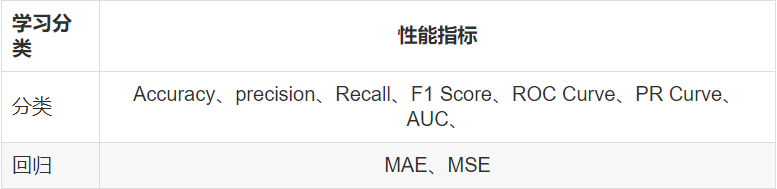

常用的ACC、ROC、AUC等

（1）accuracy_score

注：准确率是我们最常见的评价指标，而且很容易理解，就是被分对的样本数除以所有的样本数，通常来说，正确率越高，分类器越好。 

In [31]:
from sklearn import metrics
acc_test_lg = metrics.accuracy_score(y_test, pred_test_lg)
print("测试集准确率:%5.2f"% acc_test_lg)

测试集准确率: 0.64


（2）ROC曲线和AUC

&emsp;&emsp;ROC曲线指受试者工作特征曲线/接收器操作特性(receiver operating characteristic，ROC)曲线,是反映灵敏性和特效性连续变量的综合指标,是用构图法揭示敏感性和特异性的相互关系，它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性。  
&emsp;&emsp;ROC曲线是根据一系列不同的二分类方式（分界值或决定阈），以真正例率（也就是灵敏度）（True Positive Rate,TPR）为纵坐标，假正例率（1-特效性）（False Positive Rate,FPR）为横坐标绘制的曲线。  
&emsp;&emsp;ROC观察模型正确地识别正例的比例与模型错误地把负例数据识别成正例的比例之间的权衡。TPR的增加以FPR的增加为代价。ROC曲线下的面积是模型准确率的度量，AUC（Area under roccurve）。

In [32]:
print(' AUC (Train)',metrics.roc_auc_score(y_train,prob_train_lg))
print(' AUC (Test)',metrics.roc_auc_score(y_test,prob_test_lg ))

 AUC (Train) 0.6992875234179922
 AUC (Test) 0.6861267007228582


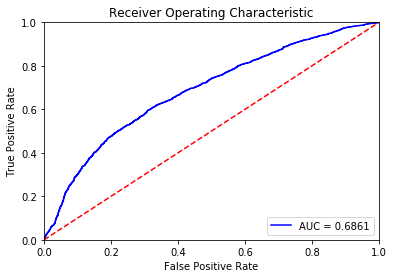

In [33]:
# ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob_test_lg)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

（3）混淆矩阵

In [34]:
metrics.confusion_matrix(y_test,pred_test_lg)

array([[1834,  909],
       [1026, 1631]], dtype=int64)

#### 调整参数建立模型

使用lasso变量选择建立分类模型

In [35]:
clf_lg =  LogisticRegression(random_state=0, penalty="l1")

In [36]:
clf_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
pred_test_lg = clf_lg.predict(X_test)
prob_test_lg = clf_lg.predict_proba(X_test)[:,1]
pred_train_lg = clf_lg.predict(X_train)
prob_train_lg = clf_lg.predict_proba(X_train)[:,1]

In [38]:
acc_test = metrics.accuracy_score(y_test, pred_test_lg)
print("测试集准确率:%3.2f"% acc_test)

测试集准确率:0.64


In [39]:
print(' AUC (Train)',metrics.roc_auc_score(y_train,prob_train_lg))
print(' AUC (Test)',metrics.roc_auc_score(y_test,prob_test_lg ))

 AUC (Train) 0.6992807182433374
 AUC (Test) 0.6861673145904907


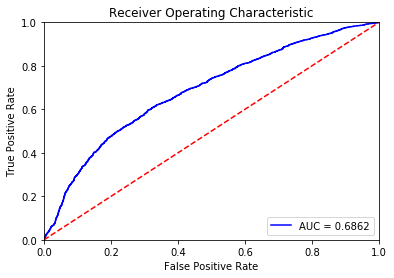

In [40]:
# ROC
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test,prob_test_lg)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

通过对比分析可见，使用L1惩罚和L2惩罚对于模型预测的表现无太大差异。

In [41]:
metrics.confusion_matrix(y_test,pred_test_lg)

array([[1835,  908],
       [1027, 1630]], dtype=int64)

### 4.2 决策树模型

#### 4.2.1 模型简介

&emsp;&emsp;决策树是一种机器学习的方法。决策树的生成算法有ID3, C4.5和C5.0等。决策树是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果。通过学习样本得到一个决策树，这个决策树能够对新的数据给出正确的分类。

决策树的学习过程:  
1）特征选择：从训练数据的特征中选择一个特征作为当前节点的分裂标准（特征选择的标准不同产生了不同的特征决策树算法）  
2）决策树生成：根据所选特征评估标准，从上至下递归地生成子节点，直到数据集不可分则停止决策树生成  
3）剪枝：决策树容易过拟合，需要剪枝来缩小树的结构和规模（包括预剪枝和后剪枝）。

#### 4.2.2 建模步骤

默认参数下建立模型

1、建立模型

In [42]:
# 引入DecisionTree
from sklearn.tree import DecisionTreeClassifier
# 使用默认参数建立模型
clf_dt =  DecisionTreeClassifier(random_state=0)

2、训练模型

In [43]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

3、预测

In [44]:
pred_test_dt = clf_dt.predict(X_test)
prob_test_dt = clf_dt.predict_proba(X_test)[:,1]
pred_train_dt = clf_dt.predict(X_train)
prob_train_dt = clf_dt.predict_proba(X_train)[:,1]

4、模型评估

（1）accuracy_score

In [45]:
acc_train_dt = metrics.accuracy_score(y_train, pred_train_dt)
print("训练集准确率:%3.2f"% acc_train_dt)
acc_test_dt = metrics.accuracy_score(y_test, pred_test_dt)
print("测试集准确率:%3.2f"% acc_test_dt)

训练集准确率:1.00
测试集准确率:0.61


(2)AUC

In [46]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_dt)
AUC_test = metrics.roc_auc_score(y_test,prob_test_dt)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 1.0
 AUC (Test) 0.6119008785630264


通过训练集和测试集的准确率和AUC值可以看出模型存在过拟合现象，需要通过参数调整提高预测的精度

**调整参数下建立模型**

In [47]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

参数说明：  
（1）特征选择标准criterion：可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。  
（2）特征划分点选择标准splitter：可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"  
（3）划分时考虑的最大特征数max_features：可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。  
（4）决策树最大深max_depth：决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。  
（5）内部节点再划分所需最小样本数min_samples_split：这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。  
（6）叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。  
（7）最大叶子节点数max_leaf_nodes：通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。  
（8）类别权重class_weight：指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"  
（9）节点划分最小不纯度min_impurity_split： 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。  
（10）数据是否预排序presort：这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。

In [48]:
#对于过拟合现象，可以通过调整max_depth，max_leaf_nodes参数防止过拟合。具体可以通过格子点搜索选择最优参数
#拟合数据
clf_dt1 = DecisionTreeClassifier(random_state=0,max_depth=5,max_leaf_nodes=8).fit(X_train, y_train)
#预测
pred_test_dt1 = clf_dt1.predict(X_test)
prob_test_dt1 = clf_dt1.predict_proba(X_test)[:,1]
pred_train_dt1 = clf_dt1.predict(X_train)
prob_train_dt1 = clf_dt1.predict_proba(X_train)[:,1]

参数调整后模型评价

In [49]:
acc_train_dt1 = metrics.accuracy_score(y_train, pred_train_dt1)
print("训练集准确率:%3.2f"% acc_train_dt1)
acc_test_dt1 = metrics.accuracy_score(y_test, pred_test_dt1)
print("测试集准确率:%3.2f"% acc_test_dt1)

训练集准确率:0.70
测试集准确率:0.69


In [50]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_dt1)
AUC_test = metrics.roc_auc_score(y_test,prob_test_dt1)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.7693320519441501
 AUC (Test) 0.7552493080892534


In [56]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import graphviz
import pydotplus

#Create DOT data
dot_data = tree.export_graphviz(clf_dt, out_file=None,feature_names = X.columns,
                               filled=True, rounded=True,
                                special_characters=True)
# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### 4.3 随机森林

随机森林是一种集成算法（Ensemble Learning），它属于Bagging类型，通过组合多个弱分类器，最终结果通过投票或取均值，使得整体模型的结果具有较高的精确度和泛化性能。其可以取得不错成绩，主要归功于“随机”和“森林”，一个使它具有抗过拟合能力，一个使它更加精准。

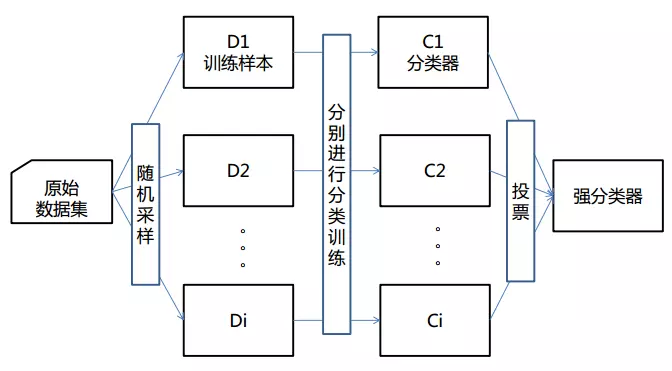

Bagging

Bagging也叫自举汇聚法（bootstrap aggregating），是一种在原始数据集上通过有放回抽样重新选出k个新数据集来训练分类器的集成技术。它使用训练出来的分类器的集合来对新样本进行分类，然后用多数投票或者对输出求均值的方法统计所有分类器的分类结果，结果最高的类别即为最终标签。此类算法可以有效降低bias，并能够降低variance。

【自助法】它通过自助法（bootstrap）重采样技术，从训练集里面采集固定个数的样本，但是每采集一个样本后，都将样本放回。也就是说，之前采集到的样本在放回后有可能继续被采集到。  
【OOB】在Bagging的每轮随机采样中，训练集中大约有36.8%的数据没有被采样集采集中。对于这部分没采集到的数据，我们常常称之为袋外数据(Out Of Bag，简称OOB)。这些数据没有参与训练集模型的拟合，因此可以用来检测模型的泛化能力。  
【随机性】对于我们的Bagging算法，一般会对样本使用boostrap进行随机采集，每棵树采集相同的样本数量，一般小于原始样本量。这样得到的采样集每次的内容都不同，通过这样的自助法生成k个分类树组成随机森林，做到样本随机性。  
【输出】Bagging的集合策略也比较简单，对于分类问题，通常使用简单投票法，得到最多票数的类别或者类别之一为最终的模型输出。对于回归问题，通常使用简单平均法，对T个弱学习器得到的回归结果进行算术平均得到最终的模型输出。

随机森林

随机森林(Random Forest，RF）是Bagging算法的一种，其实在介绍完Bagging算法之后，随机森林几乎是呼之欲出的，RF相对于Bagging只是对其中一些细节做了自己的规定和设计。

【弱分类器】首先，RF使用了CART决策树作为弱学习器。换句话说，其实我们只是将使用CART决策树作为弱学习器的Bagging方法称为随机森林。  
【随机性】同时，在生成每棵树的时候，每个树选取的特征都仅仅是随机选出的少数特征，一般默认取特征总数m的开方。而一般的CART树则是会选取全部的特征进行建模。因此，不但特征是随机的，也保证了特征随机性。  
【样本量】相对于一般的Bagging算法，RF会选择采集和训练集样本数N一样个数的样本。  
【特点】由于随机性，对于降低模型的方差很有作用，故随机森林一般不需要额外做剪枝，即可以取得较好的泛化能力和抗过拟合能力（Low Variance）。当然对于训练集的拟合程度就会差一些，也就是模型的偏倚会大一些（High Bias），仅仅是相对的。

### 4.3.2 建模

1、默认参数条件下建模

（1）建立模型

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf_rf0 = RandomForestClassifier(random_state=10)

(2)拟合数据

In [69]:
clf_rf0.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

（3）预测

In [70]:
pred_test_rf0  = clf_rf0.predict(X_test)
prob_test_rf0  = clf_rf0.predict_proba(X_test)[:,1]
pred_train_rf0  = clf_rf0.predict(X_train)
prob_train_rf0  = clf_rf0.predict_proba(X_train)[:,1]

（4）模型评价

In [71]:
acc_train_rf0 = metrics.accuracy_score(y_train, pred_train_rf0)
print("训练集准确率:%3.2f"% acc_train_rf0)
acc_test_rf0 = metrics.accuracy_score(y_test, pred_test_rf0)
print("测试集准确率:%3.2f"% acc_test_rf0)

训练集准确率:0.98
测试集准确率:0.67


In [72]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_rf0)
AUC_test = metrics.roc_auc_score(y_test,prob_test_rf0)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.998747961283093
 AUC (Test) 0.7282303838106537


训练集上AUC接近1，存在过拟合问题，通过调整参数，提高预测精度

参数调整过程

RF需要调参的参数也包括两部分，第一部分是Bagging框架的参数，第二部分是CART决策树的参数。

（1）RF框架参数

1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

2) oob_score :即是否采用袋外样本来评估模型的好坏。默认识False。个人推荐设置为True，因为袋外分数反应了一个模型拟合后的泛化能力。

3) criterion: 即CART树做划分时对特征的评价标准。分类模型和回归模型的损失函数是不一样的。分类RF对应的CART分类树默认是基尼系数gini,另一个可选择的标准是信息增益。回归RF对应的CART回归树默认是均方差mse，另一个可以选择的标准是绝对值差mae。一般来说选择默认的标准就已经很好的。

（2）RF决策树参数

参数说明：  
（1）特征选择标准criterion：可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。  
（2）特征划分点选择标准splitter：可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"  
（3）划分时考虑的最大特征数max_features：可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。  
（4）决策树最大深max_depth：决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。  
（5）内部节点再划分所需最小样本数min_samples_split：这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。  
（6）叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。  
（7）最大叶子节点数max_leaf_nodes：通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。  
（8）类别权重class_weight：指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"  
（9）节点划分最小不纯度min_impurity_split： 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。  
（10）数据是否预排序presort：这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。

我们首先对n_estimators进行网格搜索：

In [81]:
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':list(range(10,71,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76807, std: 0.00470, params: {'n_estimators': 10},
  mean: 0.76977, std: 0.00545, params: {'n_estimators': 20},
  mean: 0.77045, std: 0.00552, params: {'n_estimators': 30},
  mean: 0.77086, std: 0.00550, params: {'n_estimators': 40},
  mean: 0.77100, std: 0.00543, params: {'n_estimators': 50},
  mean: 0.77170, std: 0.00541, params: {'n_estimators': 60},
  mean: 0.77171, std: 0.00525, params: {'n_estimators': 70}],
 {'n_estimators': 70},
 0.7717142705117676)

这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [83]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                                  param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75624, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 50},
  mean: 0.75623, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 70},
  mean: 0.75623, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 90},
  mean: 0.75618, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 110},
  mean: 0.75618, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 130},
  mean: 0.75619, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 150},
  mean: 0.75619, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 170},
  mean: 0.75617, std: 0.00888, params: {'max_depth': 3, 'min_samples_split': 190},
  mean: 0.76432, std: 0.00814, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.76437, std: 0.00821, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.76440, std: 0.00806, params: {'max_depth': 5, 'min_samples_split': 90},
  mean: 0.76428, std: 0.00829, params: {'max_depth': 5, 'min_samples_split': 110},
  mean: 0.

对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [85]:
param_test3 = {'min_samples_split':list(range(80,150,20)), 'min_samples_leaf':list(range(10,60,10))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=9,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
                                   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.77282, std: 0.00536, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: 0.77253, std: 0.00588, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.77313, std: 0.00589, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: 0.77216, std: 0.00610, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: 0.77228, std: 0.00561, params: {'min_samples_leaf': 20, 'min_samples_split': 80},
  mean: 0.77176, std: 0.00585, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.77232, std: 0.00528, params: {'min_samples_leaf': 20, 'min_samples_split': 120},
  mean: 0.77216, std: 0.00509, params: {'min_samples_leaf': 20, 'min_samples_split': 140},
  mean: 0.77152, std: 0.00590, params: {'min_samples_leaf': 30, 'min_samples_split': 80},
  mean: 0.77137, std: 0.00522, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.77170, std: 0.00628, params: {'min_samples_leaf': 30, 'min_samples_split': 120},
  

最后我们再对最大特征数max_features做调参:

In [86]:
param_test4 = {'max_features':list(range(3,11,2))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=9, min_samples_split=120,
                                  min_samples_leaf=10 ,oob_score=True, random_state=10),
                                   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.77313, std: 0.00589, params: {'max_features': 3},
  mean: 0.77279, std: 0.00614, params: {'max_features': 5},
  mean: 0.77306, std: 0.00605, params: {'max_features': 7},
  mean: 0.77326, std: 0.00599, params: {'max_features': 9}],
 {'max_features': 9},
 0.773263329495866)

用我们搜索到的最佳参数，我们再看看最终的模型拟合：

In [89]:
clf_rf2 = RandomForestClassifier(n_estimators= 70, max_depth=9, min_samples_split=120,
                                  min_samples_leaf=10,max_features=9 ,oob_score=True, random_state=10)
clf_rf2.fit(X_train,y_train)
pred_test_rf2  = clf_rf2.predict(X_test)
prob_test_rf2  = clf_rf2.predict_proba(X_test)[:,1]
pred_train_rf2  = clf_rf2.predict(X_train)
prob_train_rf2  = clf_rf2.predict_proba(X_train)[:,1]

In [90]:
acc_train_rf2 = metrics.accuracy_score(y_train, pred_train_rf2)
print("训练集准确率:%3.2f"% acc_train_rf2)
acc_test_rf2 = metrics.accuracy_score(y_test, pred_test_rf2)
print("测试集准确率:%3.2f"% acc_test_rf2)

训练集准确率:0.74
测试集准确率:0.69


In [91]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_rf2)
AUC_test = metrics.roc_auc_score(y_test,prob_test_rf2)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.8206803334737216
 AUC (Test) 0.7597209497992015


In [92]:
print(acc_test_rf0,acc_test_rf2)

0.6696296296296296 0.6927777777777778


可见参数调整后模型精度有相应的提升

### 4.3 SVM算法

#### 4.3.1 模型简介

支持向量的目标就是找到一个分割面能够将两类给区分开来，同时和两类中离分割面最近的那些样本点保持最大的距离。这里有两个间隔：函数间隔和几何间隔（具体课看统计学习方法这本书中的方程式进行理解）

#### 4.3.2 建模

默认参数下建立模型

1、建立模型

In [51]:
from sklearn.svm import SVC

clf_svm0 = SVC(random_state=0,probability=True)

2、训练模型

In [52]:
clf_svm0.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

3、预测

In [53]:
pred_test_svm0 = clf_svm0.predict(X_test)
prob_test_svm0 = clf_svm0.predict_proba(X_test)[:,1]
pred_train_svm0 = clf_svm0.predict(X_train)
prob_train_svm0 = clf_svm0.predict_proba(X_train)[:,1]

In [ ]:
4、模型评估

In [54]:
acc_train_svm0 = metrics.accuracy_score(y_train, pred_train_svm0)
print("训练集准确率:%3.2f"% acc_train_svm0)
acc_test_svm0 = metrics.accuracy_score(y_test, pred_test_svm0)
print("测试集准确率:%3.2f"% acc_test_svm0)

训练集准确率:0.71
测试集准确率:0.66


In [55]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_svm0)
AUC_test = metrics.roc_auc_score(y_test,prob_test_svm0)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.7784941988406503
 AUC (Test) 0.7213581332219927


svm肯定需要调参~，对结果影响也很大。

支持向量机重要参数

SVC参数解释   
（1）C: 目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0；  
（2）kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是”RBF”;   
（3）degree：if you choose ‘Poly’ in param 2, this is effective, degree决定了多项式的最高次幂；   
（4）gamma：核函数的系数(‘Poly’, ‘RBF’ and ‘Sigmoid’), 默认是gamma = 1 / n_features;   
（5）coef0：核函数中的独立项，’RBF’ and ‘Poly’有效；   
（6）probablity: 可能性估计是否使用(true or false)；  
（7）shrinking：是否进行启发式； 
（8）tol（default = 1e - 3）: svm结束标准的精度;   
（9）cache_size: 制定训练所需要的内存（以MB为单位）；   
（10）class_weight: 每个类所占据的权重，不同的类设置不同的惩罚参数C, 缺省的话自适应；   
（11）verbose: 跟多线程有关，不大明白啥意思具体； 
（12）max_iter: 最大迭代次数，default = 1， if max_iter = -1, no limited;    
（13）decision_function_shape ： ‘ovo’ 一对一, ‘ovr’ 多对多 or None 无, default=None   
（14）random_state ：用于概率估计的数据重排时的伪随机数生成器的种子。   
ps：7,8,9一般不考虑。 

本实验通过调整C和gamma来优化模型

In [57]:
from sklearn.model_selection import GridSearchCV 

# 交叉验证分类器   
def svm_cross_validation(X_train, y_train):        
    model = SVC(kernel='rbf', probability=True)    
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}    
    grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
    grid_search.fit(X_train, y_train)    
    best_parameters = grid_search.best_estimator_.get_params()    
    for para, val in list(best_parameters.items()):    
        print(para, val)    
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)    
    model.fit(X_train, y_train)    
    return model

SVM较为耗时，可以课后自己训练

In [64]:
clf_svm1 = SVC(kernel='rbf', probability=True,C=100).fit(X_train,y_train)

In [65]:
pred_test_svm1 = clf_svm1.predict(X_test)
prob_test_svm1 = clf_svm1.predict_proba(X_test)[:,1]
pred_train_svm1 = clf_svm1.predict(X_train)
prob_train_svm1 = clf_svm1.predict_proba(X_train)[:,1]

In [66]:
acc_train_svm1 = metrics.accuracy_score(y_train, pred_train_svm1)
print("训练集准确率:%3.2f"% acc_train_svm1)
acc_test_svm1 = metrics.accuracy_score(y_test, pred_test_svm1)
print("测试集准确率:%3.2f"% acc_test_svm1)

训练集准确率:0.85
测试集准确率:0.63


In [59]:
acc_train_svm1 = metrics.accuracy_score(y_train, pred_train_svm1)
print("训练集准确率:%3.2f"% acc_train_svm1)
acc_test_svm1 = metrics.accuracy_score(y_test, pred_test_svm1)
print("测试集准确率:%3.2f"% acc_test_svm1)

训练集准确率:0.67
测试集准确率:0.66


In [60]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_svm1)
AUC_test = metrics.roc_auc_score(y_test,prob_test_svm1)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.7343169079101082
 AUC (Test) 0.713439663914757


### 4.4 Adaboost

#### 4.4.1 模型简介

在boosting系列算法中， Adaboost是最著名的算法之一。Adaboost既可以用作分类，也可以用作回归。boosting算法系列的基本思想，如下图：

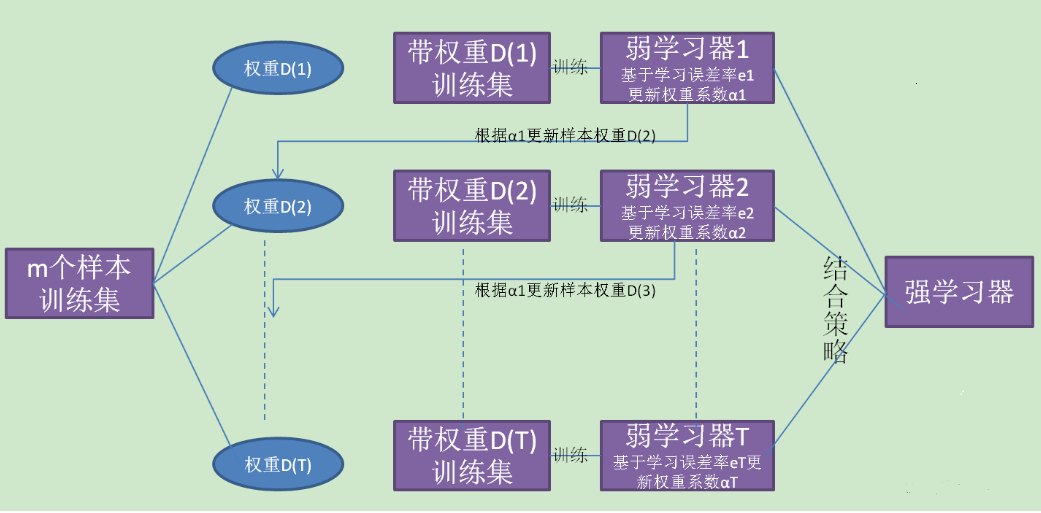

从图中可以看出，Boosting算法的工作机制是首先从训练集用初始权重训练出一个弱学习器1，根据弱学习的学习误差率表现来更新训练样本的权重，使得之前弱学习器1学习误差率高的训练样本点的权重变高，使得这些误差率高的点在后面的弱学习器2中得到更多的重视。然后基于调整权重后的训练集来训练弱学习器2.，如此重复进行，直到弱学习器数达到事先指定的数目T，最终将这T个弱学习器通过集合策略进行整合，得到最终的强学习器。　

#### 4.2.2 建立模型

默认参数下调整参数

（1）建模

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf_adt = AdaBoostClassifier(random_state=0)

（2）拟合

In [98]:
clf_adt.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=0)

(3)预测

In [99]:
pred_test_adt = clf_adt.predict(X_test)
prob_test_adt = clf_adt.predict_proba(X_test)[:,1]
pred_train_adt = clf_adt.predict(X_train)
prob_train_adt = clf_adt.predict_proba(X_train)[:,1]

In [100]:
acc_train_adt = metrics.accuracy_score(y_train, pred_train_adt)
print("训练集准确率:%3.2f"% acc_train_adt)
acc_test_adt = metrics.accuracy_score(y_test, pred_test_adt)
print("测试集准确率:%3.2f"% acc_test_adt)

训练集准确率:0.67
测试集准确率:0.66


In [103]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_adt)
AUC_test = metrics.roc_auc_score(y_test,prob_test_adt)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.741421535454078
 AUC (Test) 0.7180490634730262


重要参数：  
1、框架参数  
1）base_estimator：理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。默认是决策树，即AdaBoostClassifier默认使用CART分类树DecisionTreeClassifier，而AdaBoostRegressor默认使用CART回归树DecisionTreeRegressor。另外有一个要注意的点是，如果我们选择的AdaBoostClassifier算法是SAMME.R，则我们的弱分类学习器还需要支持概率预测，也就是在scikit-learn中弱分类学习器对应的预测方法除了predict还需要有predict_proba。  
　2）algorithm：scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。  
 3) n_estimators：我们的弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。  
4）learning_rate:学习率 

2、弱学习器参数，参见决策树参数调整

In [101]:
clf_adt1 = AdaBoostClassifier(DecisionTreeClassifier(random_state=0,max_depth=5,max_leaf_nodes=8),
        algorithm="SAMME",n_estimators=200, learning_rate=0.8).fit(X_train,y_train)

pred_test_adt1 = clf_adt1.predict(X_test)
prob_test_adt1 = clf_adt1.predict_proba(X_test)[:,1]
pred_train_adt1 = clf_adt1.predict(X_train)
prob_train_adt1 = clf_adt1.predict_proba(X_train)[:,1]

In [102]:
acc_train_adt1 = metrics.accuracy_score(y_train, pred_train_adt1)
print("训练集准确率:%3.2f"% acc_train_adt1)
acc_test_adt1 = metrics.accuracy_score(y_test, pred_test_adt1)
print("测试集准确率:%3.2f"% acc_test_adt1)

训练集准确率:0.70
测试集准确率:0.68


In [104]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_adt1)
AUC_test = metrics.roc_auc_score(y_test,prob_test_adt1)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.783212251633179
 AUC (Test) 0.7560631633455454


### 4.5 GBDT 

#### 4.5.1 模型简介

GBDT也是集成学习Boosting家族的成员，但是却和传统的Adaboost有很大的不同。回顾下Adaboost，我们是利用前一轮迭代弱学习器的误差率来更新训练集的权重，这样一轮轮的迭代下去。GBDT也是迭代，使用了前向分布算法，但是弱学习器限定了只能使用CART回归树模型，同时迭代思路和Adaboost也有所不同。

#### 4.5.2 建立模型

在sacikit-learn中，GradientBoostingClassifier为GBDT的分类类， 而GradientBoostingRegressor为GBDT的回归类。两者的参数类型完全相同，当然有些参数比如损失函数loss的可选择项并不相同。这些参数中，类似于Adaboost，我们把重要参数分为两类，第一类是Boosting框架的重要参数，第二类是弱学习器即CART回归树的重要参数。

（1）GBDT类库boosting框架参数

1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。  
2) learning_rate: 即每个弱学习器的权重缩减系数ν，也称作步长  
 3) subsample: 子采样，取值为(0,1]。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间，默认是1.0，即不使用子采样。  
 4) loss: 即我们GBDT算法中的损失函数。分类模型和回归模型的损失函数是不一样的。
对于分类模型，有对数似然损失函数"deviance"和指数损失函数"exponential"两者输入选择。默认是对数似然损失函数"deviance"。在原理篇中对这些分类损失函数有详细的介绍。一般来说，推荐使用默认的"deviance"。它对二元分离和多元分类各自都有比较好的优化。而指数损失函数等于把我们带到了Adaboost算法。

（2）GBDT类库弱学习器参数

参见决策树

不管任何参数，都用默认的，我们拟合下数据看看：

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

clf_gbdt = GradientBoostingClassifier(random_state=10).fit(X_train,y_train)
pred_test_gbdt = clf_gbdt.predict(X_test)
prob_test_gbdt = clf_gbdt.predict_proba(X_test)[:,1]
pred_train_gbdt = clf_gbdt.predict(X_train)
prob_train_gbdt = clf_gbdt.predict_proba(X_train)[:,1]

In [107]:
acc_train_gbdt = metrics.accuracy_score(y_train, pred_train_gbdt)
print("训练集准确率:%3.2f"% acc_train_gbdt)
acc_test_gbdt = metrics.accuracy_score(y_test, pred_test_gbdt)
print("测试集准确率:%3.2f"% acc_test_gbdt)

训练集准确率:0.73
测试集准确率:0.69


In [108]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_gbdt)
AUC_test = metrics.roc_auc_score(y_test,prob_test_gbdt)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.8032378390898811
 AUC (Test) 0.7574901370731754


我们下面看看怎么通过调参提高模型的泛化能力。

首先我们从步长(learning rate)和迭代次数(n_estimators)入手。一般来说,开始选择一个较小的步长来网格搜索最好的迭代次数。这里，我们将步长初始值设置为0.1。对于迭代次数进行网格搜索如下：

In [109]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.77034, std: 0.00572, params: {'n_estimators': 20},
  mean: 0.76986, std: 0.00587, params: {'n_estimators': 30},
  mean: 0.77006, std: 0.00588, params: {'n_estimators': 40},
  mean: 0.76941, std: 0.00632, params: {'n_estimators': 50},
  mean: 0.76797, std: 0.00608, params: {'n_estimators': 60},
  mean: 0.76733, std: 0.00660, params: {'n_estimators': 70},
  mean: 0.76651, std: 0.00639, params: {'n_estimators': 80}],
 {'n_estimators': 20},
 0.7703364762680069)

可见最好的迭代次数是20。找到了一个合适的迭代次数，现在我们开始对决策树进行调参。首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [112]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(80,150,20))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76135, std: 0.00655, params: {'max_depth': 3, 'min_samples_split': 80},
  mean: 0.76135, std: 0.00655, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.76133, std: 0.00654, params: {'max_depth': 3, 'min_samples_split': 120},
  mean: 0.76133, std: 0.00654, params: {'max_depth': 3, 'min_samples_split': 140},
  mean: 0.77001, std: 0.00578, params: {'max_depth': 5, 'min_samples_split': 80},
  mean: 0.76996, std: 0.00598, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.76980, std: 0.00595, params: {'max_depth': 5, 'min_samples_split': 120},
  mean: 0.77047, std: 0.00665, params: {'max_depth': 5, 'min_samples_split': 140},
  mean: 0.76928, std: 0.00517, params: {'max_depth': 7, 'min_samples_split': 80},
  mean: 0.77000, std: 0.00638, params: {'max_depth': 7, 'min_samples_split': 100},
  mean: 0.77025, std: 0.00718, params: {'max_depth': 7, 'min_samples_split': 120},
  mean: 0.77068, std: 0.00554, params: {'max_depth': 7, 'min_samples_split': 140},
  mean:

可见最好的最大树深度是7，内部节点再划分所需最小样本数是140。由于决策树深度7是一个比较合理的值，我们把它定下来，对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [114]:
param_test3 = {'min_samples_split':list(range(80,150,20)), 'min_samples_leaf':list(range(10,60,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.76976, std: 0.00532, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: 0.76863, std: 0.00704, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.77014, std: 0.00730, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: 0.76836, std: 0.00540, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: 0.76928, std: 0.00517, params: {'min_samples_leaf': 20, 'min_samples_split': 80},
  mean: 0.77000, std: 0.00638, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.77025, std: 0.00718, params: {'min_samples_leaf': 20, 'min_samples_split': 120},
  mean: 0.77068, std: 0.00554, params: {'min_samples_leaf': 20, 'min_samples_split': 140},
  mean: 0.76849, std: 0.00530, params: {'min_samples_leaf': 30, 'min_samples_split': 80},
  mean: 0.76891, std: 0.00672, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.76965, std: 0.00561, params: {'min_samples_leaf': 30, 'min_samples_split': 120},
  

现在我们再对最大特征数max_features进行网格搜索。

In [119]:
param_test4 = {'max_features':list(range(3,11,1))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=7, min_samples_leaf =60, 
               min_samples_split =120, subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.76972, std: 0.00593, params: {'max_features': 3},
  mean: 0.77040, std: 0.00597, params: {'max_features': 4},
  mean: 0.77097, std: 0.00489, params: {'max_features': 5},
  mean: 0.77098, std: 0.00539, params: {'max_features': 6},
  mean: 0.77235, std: 0.00572, params: {'max_features': 7},
  mean: 0.77220, std: 0.00564, params: {'max_features': 8},
  mean: 0.77163, std: 0.00592, params: {'max_features': 9},
  mean: 0.77222, std: 0.00621, params: {'max_features': 10}],
 {'max_features': 7},
 0.7723502685055921)

用我们搜索到的最佳参数，我们再看看最终的模型拟合：

In [120]:
clf_gbdt1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20,max_depth=7, min_samples_leaf =60, 
               min_samples_split =120, max_features=7,subsample=0.8, random_state=10).fit(X_train,y_train)

pred_test_gbdt1 = clf_gbdt1.predict(X_test)
prob_test_gbdt1 = clf_gbdt1.predict_proba(X_test)[:,1]
pred_train_gbdt1 = clf_gbdt1.predict(X_train)
prob_train_gbdt1 = clf_gbdt1.predict_proba(X_train)[:,1]

In [121]:
acc_train_gbdt1 = metrics.accuracy_score(y_train, pred_train_gbdt1)
print("训练集准确率:%3.2f"% acc_train_gbdt1)
acc_test_gbdt1 = metrics.accuracy_score(y_test, pred_test_gbdt1)
print("测试集准确率:%3.2f"% acc_test_gbdt1)

训练集准确率:0.74
测试集准确率:0.69


In [122]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_gbdt1)
AUC_test = metrics.roc_auc_score(y_test,prob_test_gbdt1)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.8188562568162017
 AUC (Test) 0.7595853186905704


### 4.6 随机森林

随机森林是一种集成算法（Ensemble Learning），它属于Bagging类型，通过组合多个弱分类器，最终结果通过投票或取均值，使得整体模型的结果具有较高的精确度和泛化性能。其可以取得不错成绩，主要归功于“随机”和“森林”，一个使它具有抗过拟合能力，一个使它更加精准。

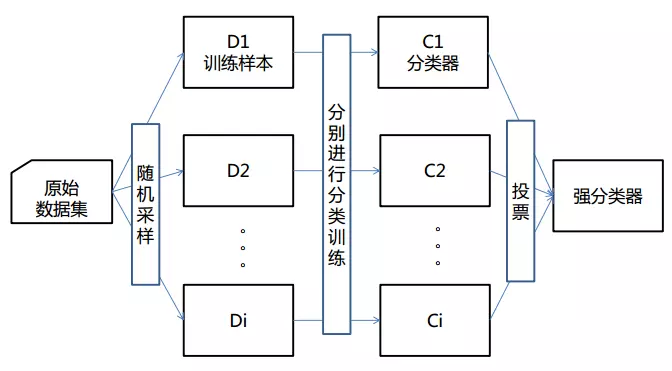

Bagging

Bagging也叫自举汇聚法（bootstrap aggregating），是一种在原始数据集上通过有放回抽样重新选出k个新数据集来训练分类器的集成技术。它使用训练出来的分类器的集合来对新样本进行分类，然后用多数投票或者对输出求均值的方法统计所有分类器的分类结果，结果最高的类别即为最终标签。此类算法可以有效降低bias，并能够降低variance。

【自助法】它通过自助法（bootstrap）重采样技术，从训练集里面采集固定个数的样本，但是每采集一个样本后，都将样本放回。也就是说，之前采集到的样本在放回后有可能继续被采集到。  
【OOB】在Bagging的每轮随机采样中，训练集中大约有36.8%的数据没有被采样集采集中。对于这部分没采集到的数据，我们常常称之为袋外数据(Out Of Bag，简称OOB)。这些数据没有参与训练集模型的拟合，因此可以用来检测模型的泛化能力。  
【随机性】对于我们的Bagging算法，一般会对样本使用boostrap进行随机采集，每棵树采集相同的样本数量，一般小于原始样本量。这样得到的采样集每次的内容都不同，通过这样的自助法生成k个分类树组成随机森林，做到样本随机性。  
【输出】Bagging的集合策略也比较简单，对于分类问题，通常使用简单投票法，得到最多票数的类别或者类别之一为最终的模型输出。对于回归问题，通常使用简单平均法，对T个弱学习器得到的回归结果进行算术平均得到最终的模型输出。

随机森林

随机森林(Random Forest，RF）是Bagging算法的一种，其实在介绍完Bagging算法之后，随机森林几乎是呼之欲出的，RF相对于Bagging只是对其中一些细节做了自己的规定和设计。

【弱分类器】首先，RF使用了CART决策树作为弱学习器。换句话说，其实我们只是将使用CART决策树作为弱学习器的Bagging方法称为随机森林。  
【随机性】同时，在生成每棵树的时候，每个树选取的特征都仅仅是随机选出的少数特征，一般默认取特征总数m的开方。而一般的CART树则是会选取全部的特征进行建模。因此，不但特征是随机的，也保证了特征随机性。  
【样本量】相对于一般的Bagging算法，RF会选择采集和训练集样本数N一样个数的样本。  
【特点】由于随机性，对于降低模型的方差很有作用，故随机森林一般不需要额外做剪枝，即可以取得较好的泛化能力和抗过拟合能力（Low Variance）。当然对于训练集的拟合程度就会差一些，也就是模型的偏倚会大一些（High Bias），仅仅是相对的。

#### 4.6.2 建模

1、默认参数条件下建模

（1）建立模型

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf_rf0 = RandomForestClassifier(random_state=10)

(2)拟合数据

In [69]:
clf_rf0.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

（3）预测

In [70]:
pred_test_rf0  = clf_rf0.predict(X_test)
prob_test_rf0  = clf_rf0.predict_proba(X_test)[:,1]
pred_train_rf0  = clf_rf0.predict(X_train)
prob_train_rf0  = clf_rf0.predict_proba(X_train)[:,1]

（4）模型评价

In [71]:
acc_train_rf0 = metrics.accuracy_score(y_train, pred_train_rf0)
print("训练集准确率:%3.2f"% acc_train_rf0)
acc_test_rf0 = metrics.accuracy_score(y_test, pred_test_rf0)
print("测试集准确率:%3.2f"% acc_test_rf0)

训练集准确率:0.98
测试集准确率:0.67


In [72]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_rf0)
AUC_test = metrics.roc_auc_score(y_test,prob_test_rf0)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.998747961283093
 AUC (Test) 0.7282303838106537


训练集上AUC接近1，存在过拟合问题，通过调整参数，提高预测精度

参数调整过程

RF需要调参的参数也包括两部分，第一部分是Bagging框架的参数，第二部分是CART决策树的参数。

（1）RF框架参数

1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

2) oob_score :即是否采用袋外样本来评估模型的好坏。默认识False。个人推荐设置为True，因为袋外分数反应了一个模型拟合后的泛化能力。

3) criterion: 即CART树做划分时对特征的评价标准。分类模型和回归模型的损失函数是不一样的。分类RF对应的CART分类树默认是基尼系数gini,另一个可选择的标准是信息增益。回归RF对应的CART回归树默认是均方差mse，另一个可以选择的标准是绝对值差mae。一般来说选择默认的标准就已经很好的。

（2）RF决策树参数

参数说明：  
（1）特征选择标准criterion：可以使用"gini"或者"entropy"，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数"gini"就可以了，即CART算法。  
（2）特征划分点选择标准splitter：可以使用"best"或者"random"。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random"  
（3）划分时考虑的最大特征数max_features：可以使用很多种类型的值，默认是"None",意味着划分时考虑所有的特征数；一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。  
（4）决策树最大深max_depth：决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。  
（5）内部节点再划分所需最小样本数min_samples_split：这个值限制了子树继续划分的条件，如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2.如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。  
（6）叶子节点最小的样本权重和min_weight_fraction_leaf：这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。  
（7）最大叶子节点数max_leaf_nodes：通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。  
（8）类别权重class_weight：指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"  
（9）节点划分最小不纯度min_impurity_split： 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点 。  
（10）数据是否预排序presort：这个值是布尔值，默认是False不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。

我们首先对n_estimators进行网格搜索：

In [81]:
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':list(range(10,71,10))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76807, std: 0.00470, params: {'n_estimators': 10},
  mean: 0.76977, std: 0.00545, params: {'n_estimators': 20},
  mean: 0.77045, std: 0.00552, params: {'n_estimators': 30},
  mean: 0.77086, std: 0.00550, params: {'n_estimators': 40},
  mean: 0.77100, std: 0.00543, params: {'n_estimators': 50},
  mean: 0.77170, std: 0.00541, params: {'n_estimators': 60},
  mean: 0.77171, std: 0.00525, params: {'n_estimators': 70}],
 {'n_estimators': 70},
 0.7717142705117676)

这样我们得到了最佳的弱学习器迭代次数，接着我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [83]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
                                  param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75624, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 50},
  mean: 0.75623, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 70},
  mean: 0.75623, std: 0.00894, params: {'max_depth': 3, 'min_samples_split': 90},
  mean: 0.75618, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 110},
  mean: 0.75618, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 130},
  mean: 0.75619, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 150},
  mean: 0.75619, std: 0.00889, params: {'max_depth': 3, 'min_samples_split': 170},
  mean: 0.75617, std: 0.00888, params: {'max_depth': 3, 'min_samples_split': 190},
  mean: 0.76432, std: 0.00814, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.76437, std: 0.00821, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.76440, std: 0.00806, params: {'max_depth': 5, 'min_samples_split': 90},
  mean: 0.76428, std: 0.00829, params: {'max_depth': 5, 'min_samples_split': 110},
  mean: 0.

对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [85]:
param_test3 = {'min_samples_split':list(range(80,150,20)), 'min_samples_leaf':list(range(10,60,10))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=9,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
                                   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.77282, std: 0.00536, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: 0.77253, std: 0.00588, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.77313, std: 0.00589, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: 0.77216, std: 0.00610, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: 0.77228, std: 0.00561, params: {'min_samples_leaf': 20, 'min_samples_split': 80},
  mean: 0.77176, std: 0.00585, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.77232, std: 0.00528, params: {'min_samples_leaf': 20, 'min_samples_split': 120},
  mean: 0.77216, std: 0.00509, params: {'min_samples_leaf': 20, 'min_samples_split': 140},
  mean: 0.77152, std: 0.00590, params: {'min_samples_leaf': 30, 'min_samples_split': 80},
  mean: 0.77137, std: 0.00522, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.77170, std: 0.00628, params: {'min_samples_leaf': 30, 'min_samples_split': 120},
  

最后我们再对最大特征数max_features做调参:

In [86]:
param_test4 = {'max_features':list(range(3,11,2))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 70, max_depth=9, min_samples_split=120,
                                  min_samples_leaf=10 ,oob_score=True, random_state=10),
                                   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.77313, std: 0.00589, params: {'max_features': 3},
  mean: 0.77279, std: 0.00614, params: {'max_features': 5},
  mean: 0.77306, std: 0.00605, params: {'max_features': 7},
  mean: 0.77326, std: 0.00599, params: {'max_features': 9}],
 {'max_features': 9},
 0.773263329495866)

用我们搜索到的最佳参数，我们再看看最终的模型拟合：

In [89]:
clf_rf2 = RandomForestClassifier(n_estimators= 70, max_depth=9, min_samples_split=120,
                                  min_samples_leaf=10,max_features=9 ,oob_score=True, random_state=10)
clf_rf2.fit(X_train,y_train)
pred_test_rf2  = clf_rf2.predict(X_test)
prob_test_rf2  = clf_rf2.predict_proba(X_test)[:,1]
pred_train_rf2  = clf_rf2.predict(X_train)
prob_train_rf2  = clf_rf2.predict_proba(X_train)[:,1]

In [90]:
acc_train_rf2 = metrics.accuracy_score(y_train, pred_train_rf2)
print("训练集准确率:%3.2f"% acc_train_rf2)
acc_test_rf2 = metrics.accuracy_score(y_test, pred_test_rf2)
print("测试集准确率:%3.2f"% acc_test_rf2)

训练集准确率:0.74
测试集准确率:0.69


In [91]:
AUC_train = metrics.roc_auc_score(y_train,prob_train_rf2)
AUC_test = metrics.roc_auc_score(y_test,prob_test_rf2)
print(' AUC (Train)',AUC_train)
print(' AUC (Test)',AUC_test)

 AUC (Train) 0.8206803334737216
 AUC (Test) 0.7597209497992015


In [92]:
print(acc_test_rf0,acc_test_rf2)

0.6696296296296296 0.6927777777777778


可见参数调整后模型精度有相应的提升